

Пусть имеется набор данных `Mall_Customers.csv` о покупателях супермаркета:

* CustomerID — идентификатор покупателя;
* Genre — пол;
* Age — возраст;
* Annual Income (k$) — годовой доход покупателя в тыс. долл.;
* Spending Score (1–100) — рейтинг трат покупателя.

Решить задачу кластеризации покупателей, чтобы в дальнейшем планировать маркетинговые акции для каждой группы.

### Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других обнаруженных свойствах данных.

In [116]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV


In [117]:
df_customers = pd.read_csv('Mall_Customers (1).csv')
df_customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [118]:
# Исправляем опечатку
df_customers.rename(columns={'Genre': 'Gender'}, inplace=True)
df_customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [119]:
df_customers['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [120]:
df_customers['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [121]:
df_customers['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137])

In [122]:
df_customers['Spending Score (1-100)'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18])

In [123]:
df_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [124]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [125]:
# Проверка на дубликаты
print(df_customers.duplicated().sum())

0


In [126]:
# Проверка на пропуски
print(df_customers.isna().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


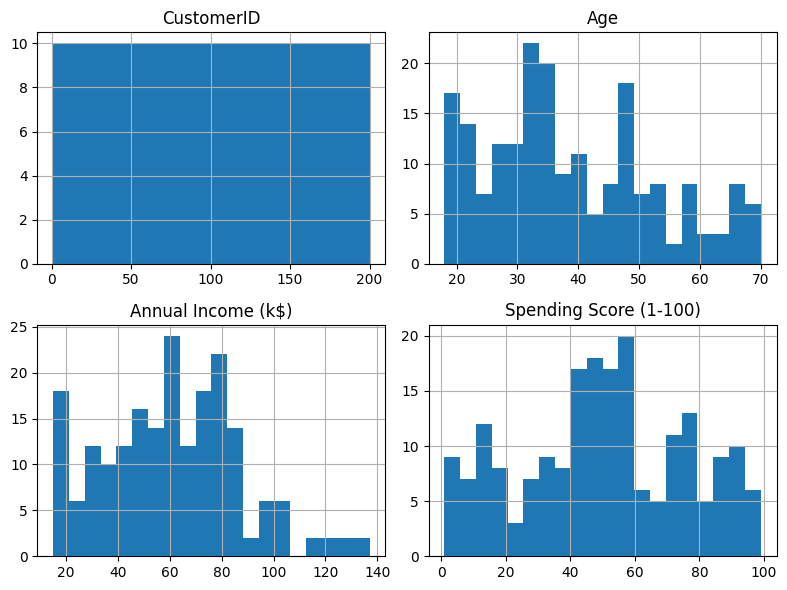

In [127]:
# Гистограммы для числовых признаков
df_customers.hist(bins=20,figsize=(8, 6))
plt.tight_layout()
plt.show()

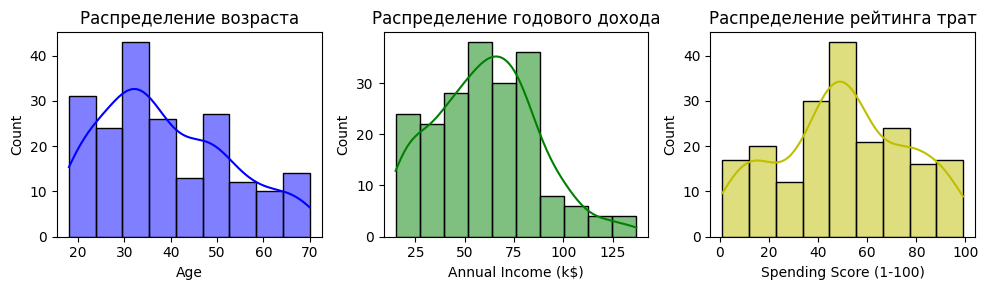

In [128]:
# Построение гистограмм для признаков
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
# Гистограмма по возрасту'
sns.histplot(df_customers['Age'], kde=True, ax=axes[0], color='b')
axes[0].set_title('Распределение возраста')
# Гистограмма по годовому доходу
sns.histplot(df_customers['Annual Income (k$)'], kde=True, ax=axes[1], color='g')
axes[1].set_title('Распределение годового дохода')
# Гистограмма по рейтингу трат
sns.histplot(df_customers['Spending Score (1-100)'], kde=True, ax=axes[2], color='y')
axes[2].set_title('Распределение рейтинга трат')
plt.tight_layout()
plt.show()

### Задание 2

Преобразуйте категориальный признак Genre в численный.

In [129]:
le= LabelEncoder()
df_customers['Gender'] = 1-le.fit_transform(df_customers['Gender'])
df_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


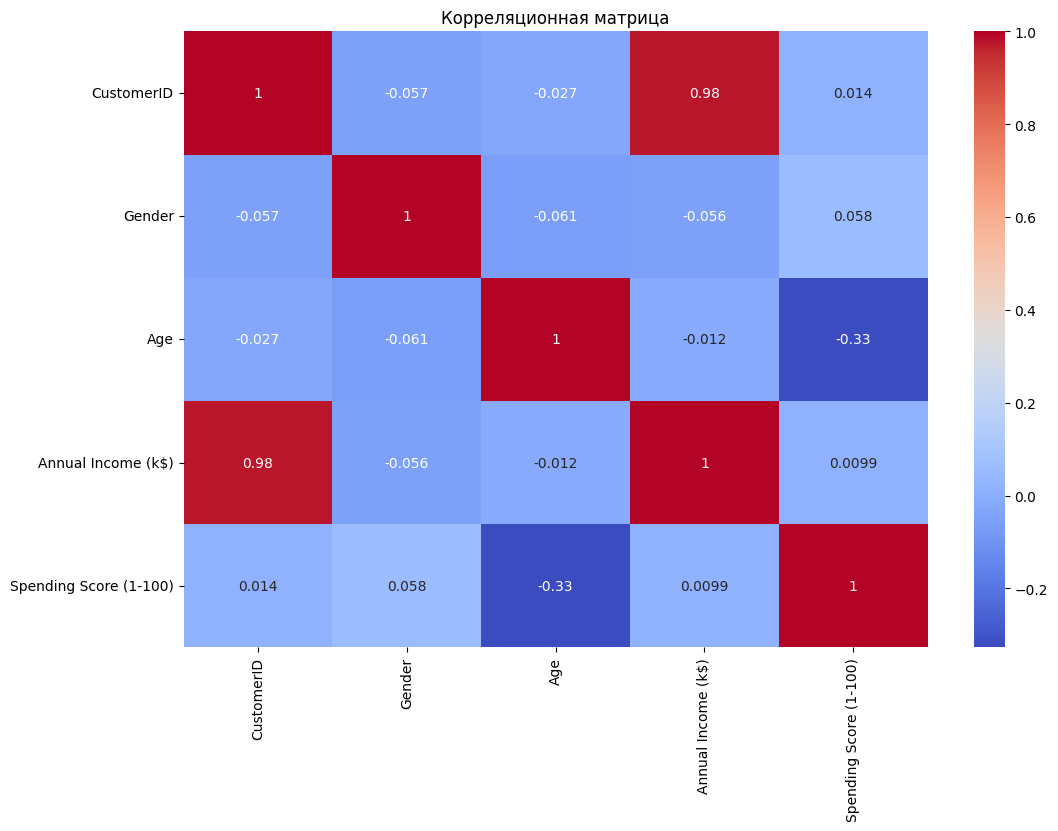

In [130]:
# Построение тепловой карты корреляций
def heat_map(data=df_customers):
  corr = data.corr()
  plt.figure(figsize=(12, 8))
  sns.heatmap(corr, annot=True, cmap='coolwarm')
  plt.title('Корреляционная матрица')
  plt.show()

heat_map()

In [131]:
# Gender имеет наменьшие коэффициенты корелляции. CastomerID вообще не нужен. Удалим из df_customers эти два признака.
df_customers.drop(['Gender','CustomerID'], axis=1, inplace=True)

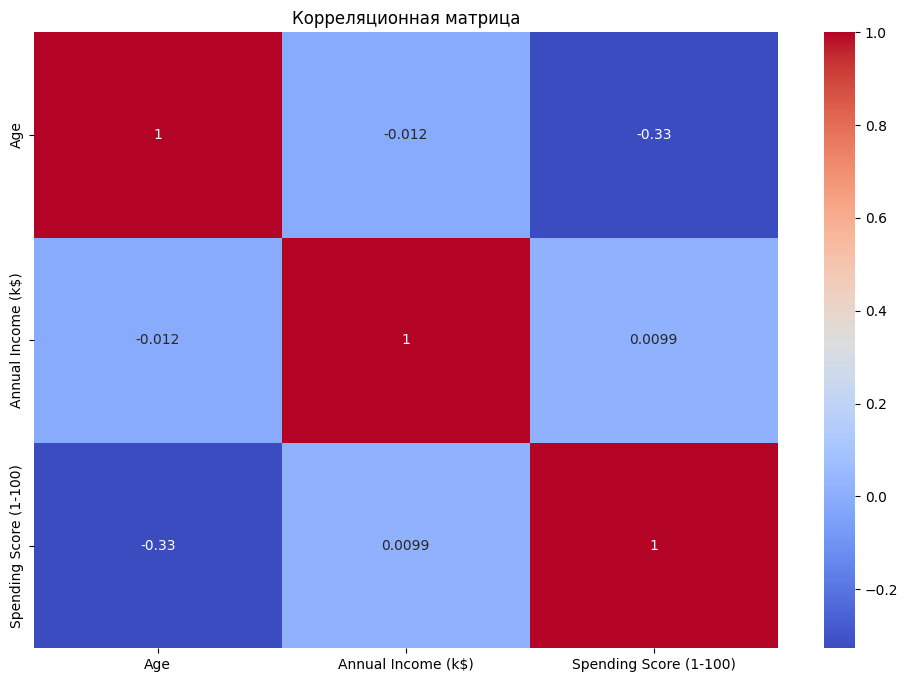

In [132]:
# Построение тепловой карты корреляций
heat_map()

### Задание 3

Метод k-средних требует явно задать количество кластеров, на которые будут разбиваться данные. Поскольку данных может быть настолько много, что построение одной модели будет занимать несколько часов, важно примерно оценить количество кластеров до запуска обучения модели.

На основе результатов разведочного анализа данных предположите, какое количество кластеров будет оптимальным, и аргументируйте предположение.

На основании разведочного анализа можно предположить, что оптимально кластеров может быть от 3 до 10, основываясь на данных о доходах ( как важном показателе по отношению к уровню трат)

<ipython-input-133-b933abcedd12>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, inertia,'bo-', color='b')


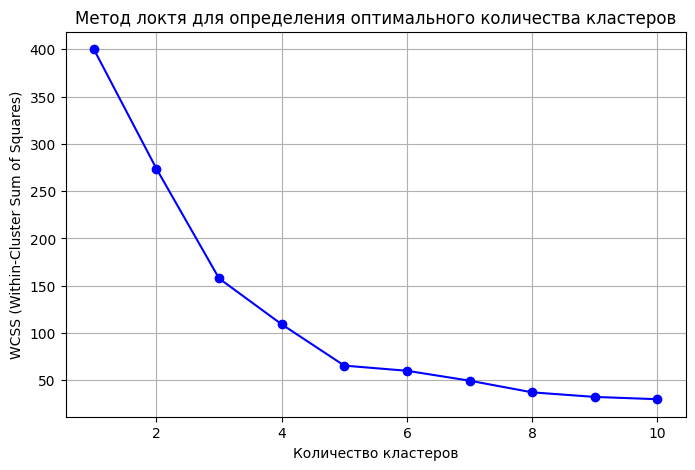

In [133]:
def elbow_method(input_data=df_customers[['Annual Income (k$)','Spending Score (1-100)']]):
    # Выбираем признаки для кластеризации: Годовой доход и рейтинг трат

    # Стандартизация данных для улучшения работы модели
    df_customers_scaler=StandardScaler()
    data_scaled=df_customers_scaler.fit_transform(input_data)
    # Применение метода локтя для выбора оптимального количества кластеров
    inertia=[]
    K=range(1, 11)  # Проверим от 1 до 10 кластеров
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data_scaled)
        inertia.append(kmeans.inertia_)

    # Построение графика метода локтя
    plt.figure(figsize=(8, 5))
    plt.plot(K, inertia,'bo-', color='b')
    plt.xlabel('Количество кластеров')
    plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
    plt.title('Метод локтя для определения оптимального количества кластеров')
    plt.grid(True)
    plt.show();

    return data_scaled

X_scaled=elbow_method()

5 кластеров демонстрируют малую инерцию, после 5 кластеров снижение инерции становится более плавным, и прирост качества кластеризации становится менее выраженным.

<ipython-input-133-b933abcedd12>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, inertia,'bo-', color='b')


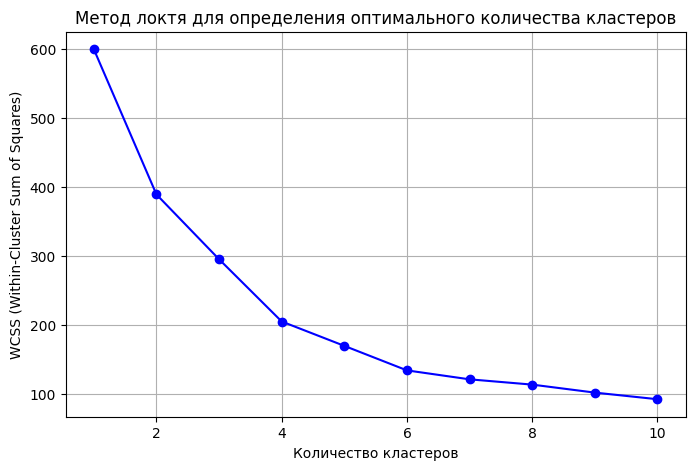

In [134]:
df_customers_scaled=elbow_method(input_data=df_customers)

5 кластеров представляют собой оптимальный баланс между качеством кластеризации и сложностью модели, так как добавление большего числа кластеров не приносит значительных улучшений, а оставаться на 4 кластерах означает упустить дополнительную важную информацию о покупателях.

### Задание 5

Постройте финальную модель кластеризации с количеством кластеров, опредёленным в предыдущем задании.

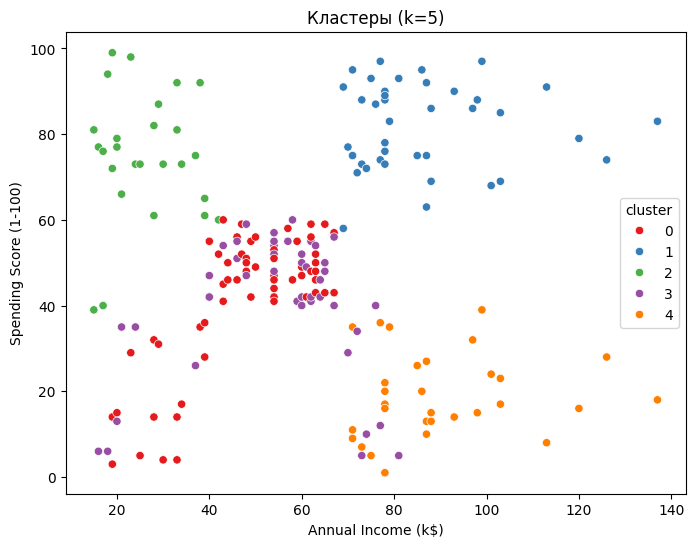

In [135]:
# Оптимальное количество кластеров, например, 5
optimal_k=5
# Финальная модель KMeans
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
df_customers['cluster'] = kmeans_final.fit_predict(df_customers_scaled)
# Визуализация кластеров (для 2D-пространства по двум признакам)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=df_customers, palette='Set1')
plt.title(f'Кластеры (k={optimal_k})')
plt.show();

Plot демонстрирует удовлетворительную кластеризацию, только 1 кластер заметно смешивается с другими и не имеет сферической формы. Попробуем агломеративную кластеризацию или попробуем снизить размерность

In [136]:
# Применение агломеративной кластеризации
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
labels_agg = agg_clustering.fit_predict(X_scaled)
# Оценка качества кластеризации с помощью коэффициента силуэта
silhouette_agg = silhouette_score(X_scaled, labels_agg)
print(f'Silhouette Score для агломеративной кластеризации: {silhouette_agg}')


Silhouette Score для агломеративной кластеризации: 0.5538089226688662


Коэффициент силуэта (Silhouette Score) от -1 до 1
Близко к 1: объекты хорошо разделены между кластерами, высокая плотность внутри кластеров.
Близко к 0: кластеры плохо отделены друг от друга, объекты на границе кластеров.
Отрицательное значение: объекты ближе к объектам другого кластера, чем к своему кластеру (плохая кластеризация).
Значение 0.55 указывает на умеренно хорошее разделение кластеров. Это означает, что объекты внутри кластеров схожи между собой, хотя есть вероятность, что некоторые кластеры всё ещё могут частично перекрываться. Это показатель, что агломеративная кластеризация справляется неплохо, но, возможно, существуют варианты улучшения (например, увеличение количества кластеров, изменение метода кластеризации)

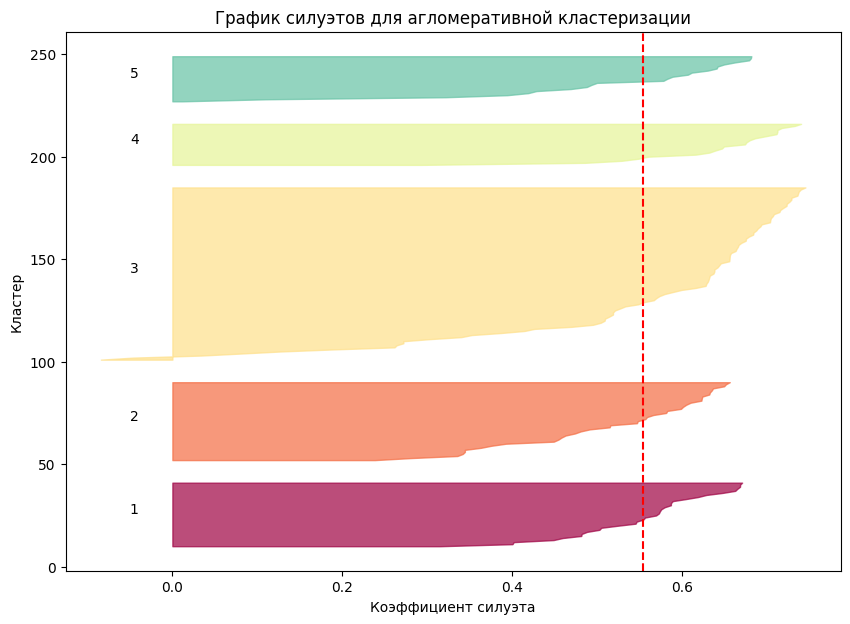

In [137]:
# Вычисление значений силуэтов для каждого объекта
silhouette_values=silhouette_samples(X_scaled, labels_agg)
# Создание фигуры и оси
plt.figure(figsize=(10,7))
y_lower=10   # Нижняя граница для графика силуэта

for i in range(5):  # 5 кластеров
    ith_cluster_silhouette_values=silhouette_values[labels_agg==i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i=ith_cluster_silhouette_values.shape[0]
    y_upper=y_lower+size_cluster_i
    color=plt.cm.Spectral(float(i)/5)
    plt.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
    plt.text(-0.05,y_lower+0.5*size_cluster_i,str(1+i))
    y_lower=y_upper+10  # Добавляем отступ для следующего кластера

# Ось и заголовки
plt.axvline(x=silhouette_score(X_scaled, labels_agg),color='red',linestyle='--')
plt.title('График силуэтов для агломеративной кластеризации')
plt.xlabel('Коэффициент силуэта')
plt.ylabel('Кластер')
plt.show()


Часть объектов 3-го кластера уходят в отрицательную область, это значит, что часть объектов плохо кластеризована

In [138]:
def fun_x_scaled():
    # Масштабирование данных
    scaler = StandardScaler()
    df_customers_scaled = scaler.fit_transform(df_customers)
    # Выбираем признаки для кластеризации: Годовой доход и рейтинг трат
    X=df_customers[['Annual Income (k$)','Spending Score (1-100)']]
    # Стандартизация данных для улучшения работы модели
    df_customers_scaler=StandardScaler()
    X_scaled=df_customers_scaler.fit_transform(X)
    return X_scaled

X_scaled=fun_x_scaled()
# Применение метода k-средних с 6 или 7 кластерами
kmeans_more_clusters = KMeans(n_clusters=6, random_state=42)
labels_kmeans_more = kmeans_more_clusters.fit_predict(X_scaled)
# Оценка качества кластеризации
silhouette_kmeans_more = silhouette_score(X_scaled, labels_kmeans_more)
print(f'Silhouette Score для k-средних с 6 кластерами: {silhouette_kmeans_more}')

Silhouette Score для k-средних с 6 кластерами: 0.5138257534676561


Результат ниже предыдущего, поэтому игнорируем.

In [139]:
# Применение PCA для снижения размерности до 2-х компонент
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)
# Применение k-средних к данным после PCA
kmeans_pca = KMeans(n_clusters=5, random_state=42)
labels_kmeans_pca = kmeans_pca.fit_predict(X_pca)

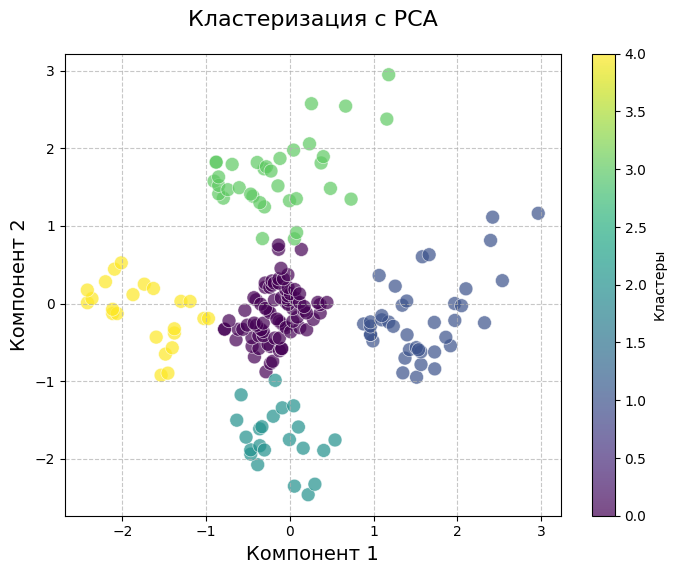

In [140]:
# Визуализация данных после PCA
# Параметры визуализации
plt.figure(figsize=(8, 6))
scatter=plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans_pca, cmap='viridis',s=100,alpha=0.7, edgecolor='w', linewidths=0.5)
# Добавление цветовой шкалы
plt.colorbar(scatter ,label='Кластеры')
# Заголовок и метки осей
plt.title('Кластеризация с PCA', fontsize=16, pad=20)
plt.xlabel('Компонент 1', fontsize=14)
plt.ylabel('Компонент 2', fontsize=14)
# Настройка сетки
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

После понижения размерности кластеризация кажется успешной

# Кластеризация. DBSCAN

Имеется некоторый набор данных `gt_2015.csv` о производительности и других параметрах электростанций:
* AT — температура окружающей среды.
* AP — давление окружающей среды.
* AH — влажность окружающей среды.
* AFDP — перепад давления на воздушном фильтре.
* GTEP — давление на выходе из газовой турбины.
* TIT — температура на входе в турбину.
* TAT — температура на выходе из турбины.
* TEY — энергоотдача турбины.
* CDP — давление нагнетания компрессора.
* CO — выбросы угарного газа.
* NOX — выбросы оксидов азота.

Решите задачу кластеризации электростанций для дальнейшего совместного управления схожими электростанциями.

# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [141]:
df_gt=pd.read_csv('gt_2015.csv')
df_gt.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [142]:
df_gt.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7384.000000,7384.00000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000
mean,17.225259,1014.50911,68.647464,3.598909,26.130149,1078.974689,546.642484,133.993380,12.097025,3.129986,59.890509
std,8.095783,6.89543,13.541116,0.610226,4.473737,19.762449,5.489066,16.179208,1.136601,2.234962,11.132464
min,-6.234800,989.40000,24.085000,2.368800,17.698000,1016.000000,516.040000,100.020000,9.870800,0.212800,25.905000
25%,11.073250,1009.67500,59.447250,3.117300,23.147000,1070.500000,544.747500,126.255000,11.465750,1.808175,52.399000
50%,17.456500,1014.00000,70.952000,3.538500,25.331000,1080.300000,549.720000,131.600000,11.933000,2.533400,56.838500
75%,23.684750,1018.30000,79.653750,4.194825,30.018250,1099.900000,550.030000,147.160000,13.148000,3.702550,65.093250
max,37.103000,1036.60000,96.666000,5.239500,40.716000,1100.400000,550.590000,179.500000,15.159000,41.097000,119.680000


In [143]:
df_gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7384 non-null   float64
 1   AP      7384 non-null   float64
 2   AH      7384 non-null   float64
 3   AFDP    7384 non-null   float64
 4   GTEP    7384 non-null   float64
 5   TIT     7384 non-null   float64
 6   TAT     7384 non-null   float64
 7   TEY     7384 non-null   float64
 8   CDP     7384 non-null   float64
 9   CO      7384 non-null   float64
 10  NOX     7384 non-null   float64
dtypes: float64(11)
memory usage: 634.7 KB


In [144]:
df_gt.duplicated().sum()

np.int64(0)

In [145]:
df_gt.isna().sum()

,0
AT,0
AP,0
AH,0
AFDP,0
GTEP,0
TIT,0
TAT,0
TEY,0
CDP,0
CO,0


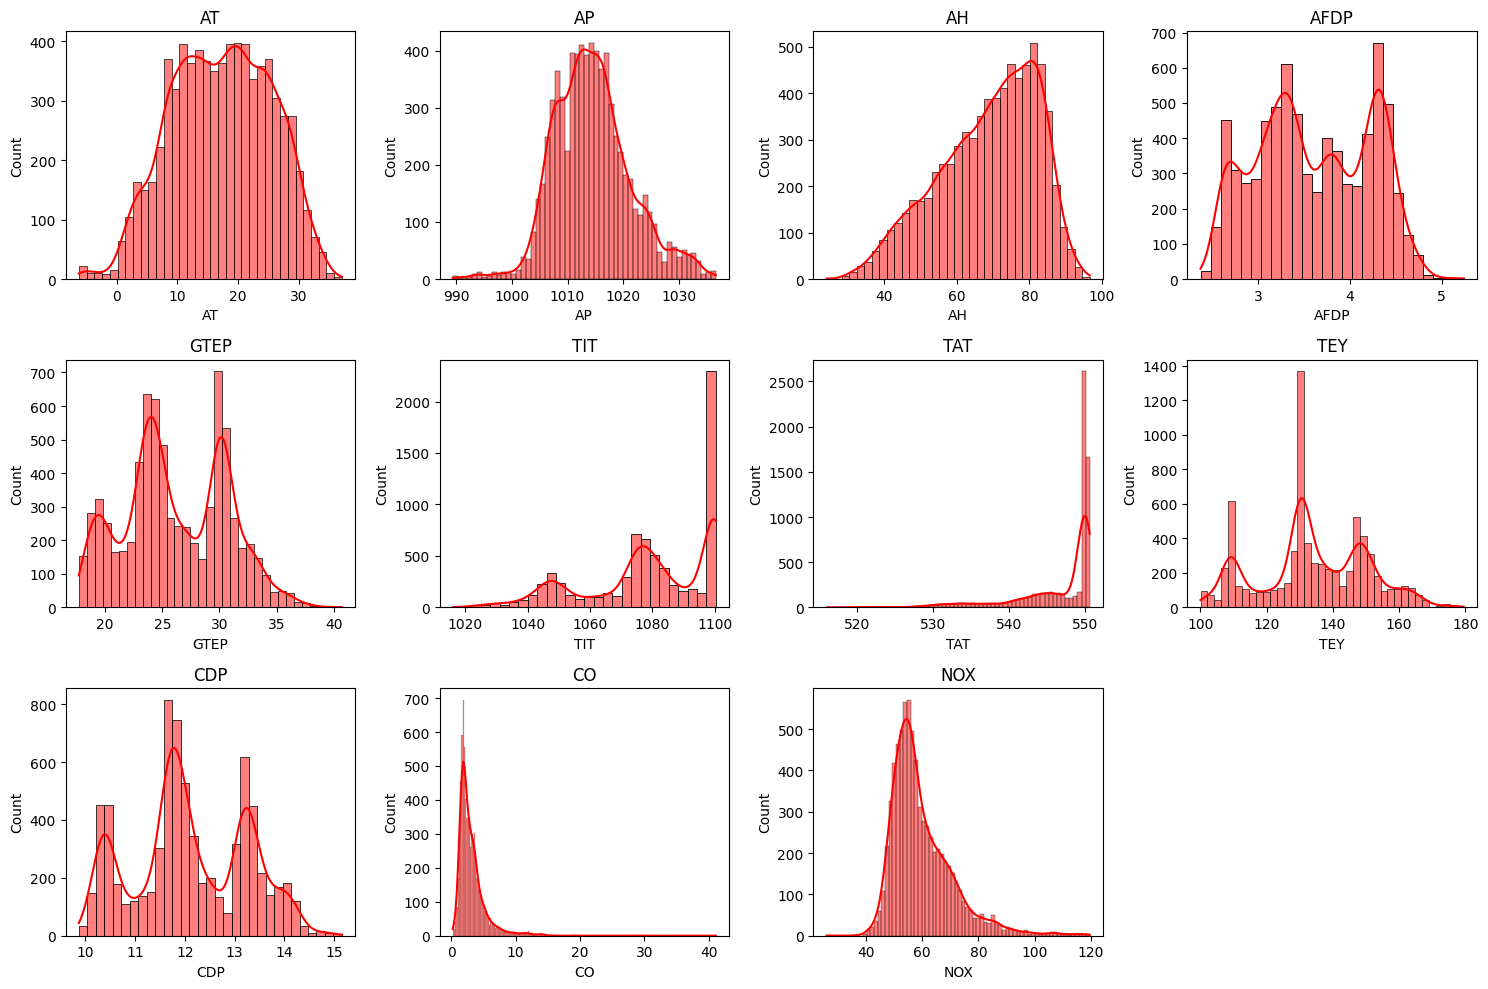

In [146]:
# Визуализация распределения каждого параметра
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_gt.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df_gt[col], kde=True, color='r')
    plt.title(col)

plt.tight_layout()
plt.show()


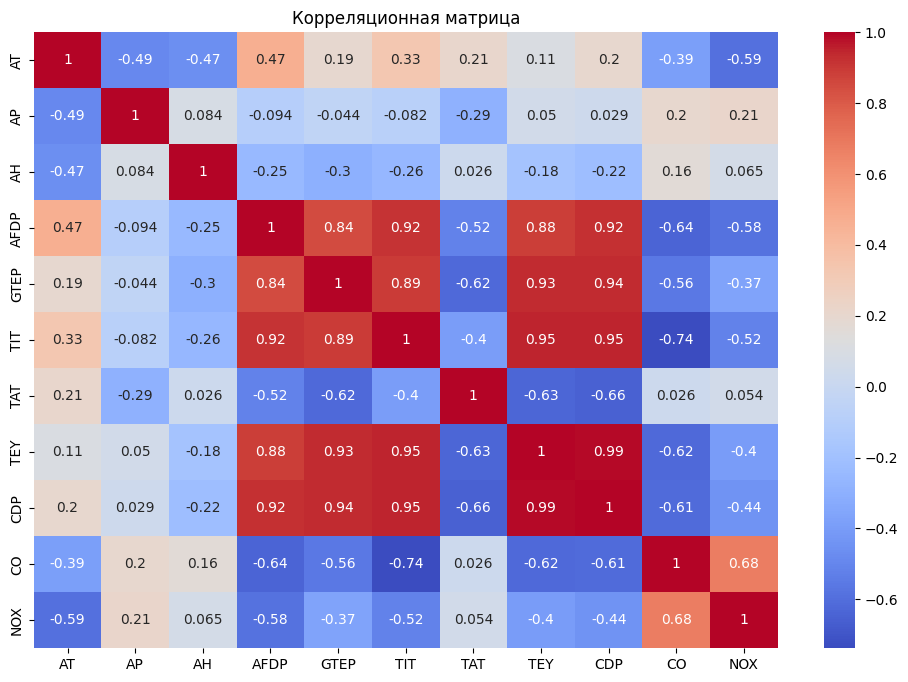

In [147]:
heat_map(data=df_gt)

1. AT (температура окружающей среды):
Сильно положительно коррелирует с PT (давление окружающей среды).
Слабо коррелирует с AH (влажность окружающей среды).
2. PT (давление окружающей среды):
Сильно положительно коррелирует с AT (температура окружающей среды).
Слабо коррелирует с AH (влажность окружающей среды).
3. AH (влажность окружающей среды):
Слабо коррелирует с AT и PT.
4. AFDP (перепад давления на воздушном фильтре):
Слабо коррелирует с другими переменными.
5. GTEP (давление на выходе из газовой турбины):
Сильно положительно коррелирует с TIT (температура на входе в турбину).
Сильно положительно коррелирует с TAT (температура на выходе из турбины).
6. TIT (температура на входе в турбину):
Сильно положительно коррелирует с GTEP и TAT.
7. TAT (температура на выходе из турбины):
Сильно положительно коррелирует с GTEP и TIT.
8. TEY (энергоотдача турбины):
Сильно положительно коррелирует с TIT и TAT.
9. CDP (давление нагнетания компрессора):
Слабо коррелирует с другими переменными.
10. CO (выбросы угарного газа):
Слабо коррелирует с другими переменными.
11. NOX (выбросы оксидов азота):
Слабо коррелирует с другими переменными.

## Задание 2

Предположите по результатам разведочного анализа данных, какие группы электростанций существуют, чем они отличаются, каково их количество.

Условно можно выделить электростанции с высокой производительностью, со сбалансированной производительностью и менее производительные.

Или можно предложить другую классификацию: Группа 1: Высокая температура на входе в турбину (TIT) и высокая энергоотдача (TEY) — эти электростанции могут работать при оптимальных условиях. Группа 2: Низкое давление на выходе из газовой турбины (GTEP) и высокие выбросы (CO, NOX) — электростанции, которые могут иметь проблемы с эффективностью или экологией. Группа 3: Умеренная температура окружающей среды (AT), но высокая влажность (AH) — это может указывать на специфические климатические условия, в которых работают эти электростанции.

Теперь пересмотрим матрицу корреляции: Высоко коррелированные признаки (выше 0.8) AH (влажность) сильно коррелирует с GTEP (давление на выходе из турбины), TIT (температура на входе), TAT (температура на выходе) и AFDP (перепад давления на воздушном фильтре). AFDP сильно коррелирует с TAT, TEY (энергоотдача), GTEP, и другими. TEY (основной показатель производительности) сильно коррелирует с TAT, TIT, GTEP, AFDP. TAT и TEY имеют практически полную корреляцию (0.99), что указывает на избыточность этих признаков. Меры:

Удаление избыточных признаков. (Когда признаки сильно коррелируют, как в случае TAT и TEY, их совместное использование не добавляет полезной информации, а может только усложнять модель.) В данном случае:

Удаление TAT, поскольку TEY — это важнейший индикатор производительности, и его влияние должно быть приоритетным. TAT можно исключить, так как он почти полностью дублирует TEY. Оптимизация выбора признаков AH (влажность) сильно коррелирует сразу с несколькими параметрами. Это может говорить о том, что влажность косвенно влияет на все процессы в системе, поэтому стоит оставить AH и удалить параметры, которые менее значимы для моделирования. AFDP сильно коррелирует с TEY и другими параметрами, что также может означать, что этот признак косвенно влияет на энергоотдачу через давление в системе. В зависимости от задачи, можно оставить TEY и удалить AFDP как менее значимый признак.



In [148]:
df_gt_cleaned=df_gt.drop(columns=['TAT','AFDP', 'GTEP', 'TIT', 'CDP'])
# Удаление коррелирующих и ненужных признаков (например, TAT, AFDP, GTEP и другие)
# Оставляем только важные: TEY (энергоотдача), AH (влажность), AT (температура) и другие значимые признаки
df_gt_cleaned.head()

,AT,AP,AH,TEY,CO,NOX
0,1.95320,1020.1,84.985,116.27,7.4491,113.250
1,1.21910,1020.1,87.523,109.18,6.4684,112.020
2,0.94915,1022.2,78.335,125.88,3.6335,88.147
3,1.00750,1021.7,76.942,132.21,3.1972,87.078
4,1.28580,1021.6,76.732,133.58,2.3833,82.515


In [149]:
df_gt_cleaned.isnull().sum()

,0
AT,0
AP,0
AH,0
TEY,0
CO,0
NOX,0


In [150]:
df_gt_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7384 non-null   float64
 1   AP      7384 non-null   float64
 2   AH      7384 non-null   float64
 3   TEY     7384 non-null   float64
 4   CO      7384 non-null   float64
 5   NOX     7384 non-null   float64
dtypes: float64(6)
memory usage: 346.3 KB


In [151]:
df_gt_cleaned

,AT,AP,AH,TEY,CO,NOX
0,1.95320,1020.1,84.985,116.27,7.4491,113.250
1,1.21910,1020.1,87.523,109.18,6.4684,112.020
2,0.94915,1022.2,78.335,125.88,3.6335,88.147
3,1.00750,1021.7,76.942,132.21,3.1972,87.078
4,1.28580,1021.6,76.732,133.58,2.3833,82.515
...,...,...,...,...,...,...
7379,3.62680,1028.5,93.200,109.08,10.9930,89.172
7380,4.16740,1028.6,94.036,108.79,11.1440,88.849
7381,5.48200,1028.5,95.219,107.81,11.4140,96.147
7382,5.88370,1028.7,94.200,131.41,3.3134,64.738


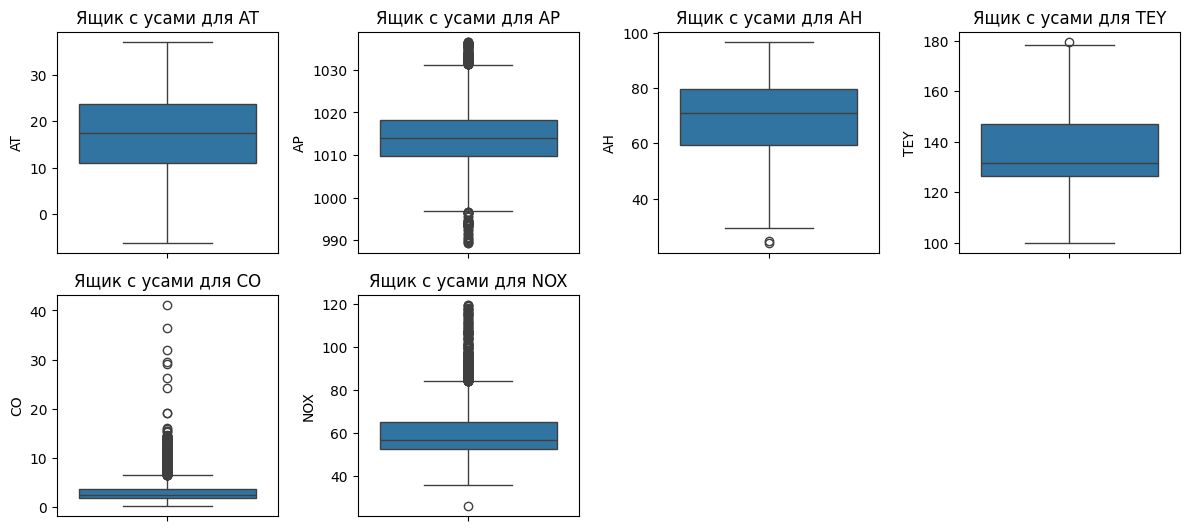

In [152]:
# Визуализация выбросов для каждого столбца
def show_boxplots(data=df_gt_cleaned):
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(data.columns, 1):
        plt.subplot(3, 4, i)
        sns.boxplot(y=data[col])
        plt.title(f'Ящик с усами для {col}')

    plt.tight_layout()
    plt.show()

show_boxplots()

boxplot показывает, что электротурбины сильно отличаются по степени загрязнения воздуха (CO и NOX), т.е. сверхнеэклолгичные (за исключением одной по NOX) и по давлению окружающей среды

In [153]:
df=df_gt_cleaned
# Нормализация AP (Atmospheric Pressure) с использованием медианы
median_ap = df['AP'].median()
iqr_ap = df['AP'].quantile(0.75) - df['AP'].quantile(0.25)
df['AP_normalized']=(df['AP']-median_ap)/(iqr_ap)
# Функция для удаления выбросов
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]

# Удаление строк с выбросами для AH (Absolute Humidity) и TEY (Total Energy Yield)
df = remove_outliers(df, 'AH')
df = remove_outliers(df, 'TEY')

# Нормализация выбросов для NOX (Nitrogen Oxides concentration)
def normalize_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    median_value = df[column].median()
    df[column] = np.where((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)), median_value, df[column])
    return df

df=normalize_outliers(df, 'NOX')
# Нормализация CO (Carbon Monoxide concentration) с использованием Winsorizing
def winsorize_series(series, limits):
    lower_limit=series.quantile(limits[0])
    upper_limit=series.quantile(limits[1])
    return np.clip(series, lower_limit, upper_limit)

df['CO'] = winsorize_series(df['CO'], [0.05, 0.95])
# Сохранение нормализованных данных
df.to_csv('normalized_data.csv', index=False)
df

,AT,AP,AH,TEY,CO,NOX,AP_normalized
0,1.95320,1020.1,84.985,116.27,7.0833,56.838,0.707246
1,1.21910,1020.1,87.523,109.18,6.4684,56.838,0.707246
2,0.94915,1022.2,78.335,125.88,3.6335,56.838,0.950725
3,1.00750,1021.7,76.942,132.21,3.1972,56.838,0.892754
4,1.28580,1021.6,76.732,133.58,2.3833,82.515,0.881159
...,...,...,...,...,...,...,...
7379,3.62680,1028.5,93.200,109.08,7.0833,56.838,1.681159
7380,4.16740,1028.6,94.036,108.79,7.0833,56.838,1.692754
7381,5.48200,1028.5,95.219,107.81,7.0833,56.838,1.681159
7382,5.88370,1028.7,94.200,131.41,3.3134,64.738,1.704348


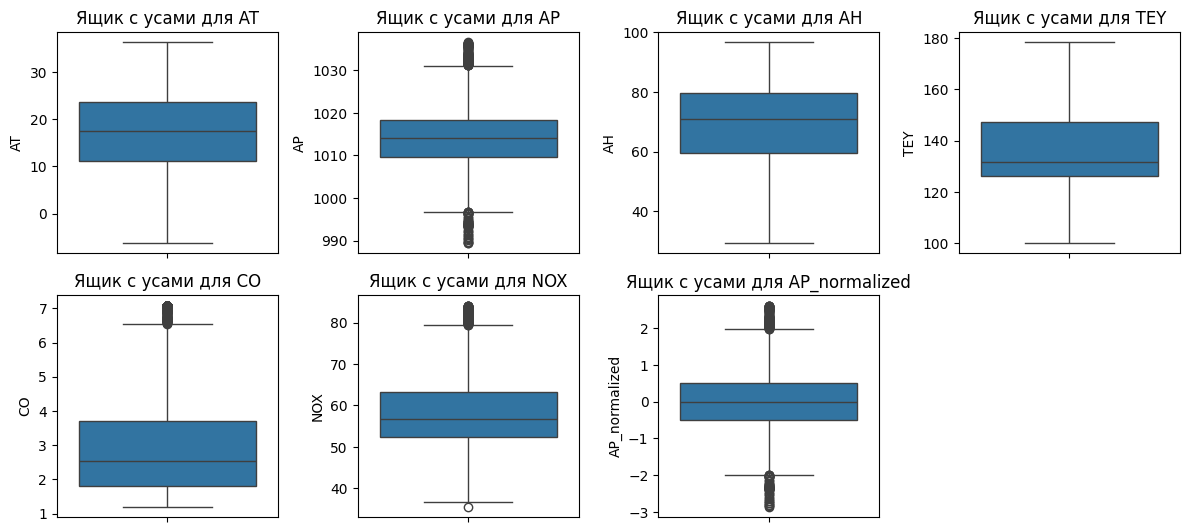

In [154]:
show_boxplots(df)

Так как выбросы еще присутствуют можно рассмотреть несколько вариантов нормализации повторная нормализация с использованием методов логарифмического преобразования или масштабирования MinMax или можно удалить выбросы

In [155]:
df.head()

,AT,AP,AH,TEY,CO,NOX,AP_normalized
0,1.95320,1020.1,84.985,116.27,7.0833,56.838,0.707246
1,1.21910,1020.1,87.523,109.18,6.4684,56.838,0.707246
2,0.94915,1022.2,78.335,125.88,3.6335,56.838,0.950725
3,1.00750,1021.7,76.942,132.21,3.1972,56.838,0.892754
4,1.28580,1021.6,76.732,133.58,2.3833,82.515,0.881159


In [156]:
# Инициализация MinMaxScaler
scaler=MinMaxScaler()
# Выбираем столбцы для нормализации
columns_to_scale=['AT', 'AH', 'TEY', 'CO', 'NOX', 'AP']
# Применение MinMaxScaler к выбранным столбцам
df[columns_to_scale]=scaler.fit_transform(df[columns_to_scale])
df.head()

,AT,AP,AH,TEY,CO,NOX,AP_normalized
0,0.192664,0.650424,0.826681,0.207562,1.000000,0.437740,0.707246
1,0.175391,0.650424,0.864339,0.117001,0.895404,0.437740,0.707246
2,0.169039,0.694915,0.728011,0.330310,0.413180,0.437740,0.950725
3,0.170412,0.684322,0.707342,0.411164,0.338964,0.437740,0.892754
4,0.176960,0.682203,0.704226,0.428663,0.200517,0.966922,0.881159


## Задание 3

Постройте модель кластеризации DBSCAN (Density-Based Spatial Clustering of Applications with Noise). Подберите оптимальные гиперпараметры, руководствуясь как результатами сеточного поиска, так и результатами анализа данных в предыдущих заданиях.

Нужно подобрать оптимальные гиперпараметры, такие как eps (радиус ближайших соседей) и min_samples (минимальное количество точек для формирования кластера).
Оптимальные значения этих параметров можно подобрать с использованием сеточного поиска или анализа плотности данных.

In [157]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)
def sliluette_scorer(estimator, X):
    labels=estimator.fit_predict(X)
    # Проверка, что есть хотя бы 2 кластера (иначе silhouette_score вернёт ошибку)
    if len(np.unique(labels))>1:
        return silhouette_score(X, labels)
    else:
        return -1
# Определение диапазонов для параметров
param_grid={
    'eps':np.arange(0.1, 1, 0.1),
    'min_samples':range(2, 10)
}
# Создание модели для поиска
dbscan=DBSCAN()
# GridSearchCV с кастомным скорером
grid_search=GridSearchCV(estimator=dbscan, param_grid=param_grid, scoring=sliluette_scorer, cv=3)
# Обучение и подбор гиперпараметров
grid_search.fit(scaled_data)
# Лучшая модель и параметры
best_model=grid_search.best_estimator_
best_params=grid_search.best_params_
print("Лучшие параметры:", best_params)
# Применение лучшей модели
df['Best_Cluster']=best_model.fit_predict(scaled_data)
# Выводим результат
print(df.head())

Лучшие параметры: {'eps': np.float64(0.9), 'min_samples': 4}
         AT        AP        AH       TEY        CO       NOX  AP_normalized  \
0  0.192664  0.650424  0.826681  0.207562  1.000000  0.437740       0.707246   
1  0.175391  0.650424  0.864339  0.117001  0.895404  0.437740       0.707246   
2  0.169039  0.694915  0.728011  0.330310  0.413180  0.437740       0.950725   
3  0.170412  0.684322  0.707342  0.411164  0.338964  0.437740       0.892754   
4  0.176960  0.682203  0.704226  0.428663  0.200517  0.966922       0.881159   

   Best_Cluster  
0             0  
1             0  
2             0  
3             0  
4             0  


In [158]:
df.describe()

,AT,AP,AH,TEY,CO,NOX,AP_normalized,Best_Cluster
count,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000
mean,0.551964,0.531976,0.584449,0.433829,0.303481,0.469071,0.059045,0.013413
std,0.190271,0.146004,0.200668,0.206578,0.267077,0.171695,0.799004,0.341698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.852174,-1.000000
25%,0.407277,0.430085,0.447846,0.334909,0.102810,0.346255,-0.498551,0.000000
50%,0.557446,0.521186,0.618509,0.403372,0.226169,0.437740,0.000000,0.000000
75%,0.703874,0.612288,0.747611,0.602120,0.424951,0.569391,0.498551,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.620290,6.000000


In [159]:
df.to_csv('transformed_data.csv', index=False)


In [160]:
# Уменьшение размерности с помощью PCA
pca=PCA(n_components=2)
pca_result=pca.fit_transform(df[['AT','AH', 'TEY', 'CO', 'NOX', 'AP']])  # Используем только нужные столбцы
# Добавление результатов PCA в DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]


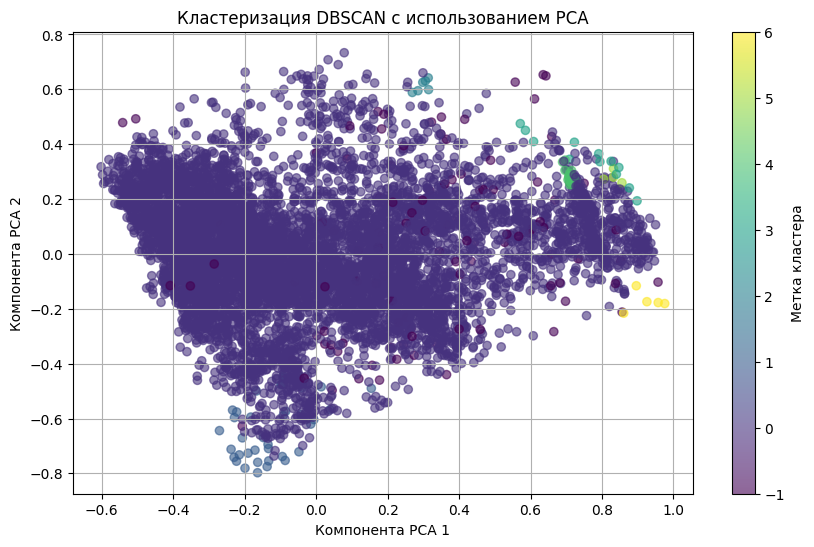

In [161]:
# Визуализация кластеров
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x='PCA1', y='PCA2', c='Best_Cluster', data=df, cmap='viridis', marker='o', alpha=0.6)
plt.title('Кластеризация DBSCAN с использованием PCA')
plt.xlabel('Компонента PCA 1')
plt.ylabel('Компонента PCA 2')
plt.colorbar(scatter, label='Метка кластера')
plt.grid(True)
plt.show()

In [162]:
# Расчет коэффициента силуэта
score=silhouette_score(df[['PCA1', 'PCA2']], df['Best_Cluster'])
print(f'Коэффициент силуэта: {score}')

Коэффициент силуэта: 0.0028287386751522357


Значение силуэтта близко к нулю. Распеределение по кластерам плохое. Для улучшения результатов можно увеличить максимальное расстояние между 2 точками для их включения в один кластер изменить значение минимальных количеств точек для формирования кластера или попробовать перемасштабировать данные. например, попробовать произвести Логарифмическое преобразование:
Когда использовать: Если ваши данные имеют сильную положительную асимметрию (много больших значений), логарифмическое преобразование может помочь сделать распределение более нормальным.
Преимущества: Уменьшает влияние больших выбросов, делает данные более симметричными.
Недостатки: Не подходит для данных с отрицательными значениями или нулями.

In [163]:
# Применение логарифмического преобразования ко всем столбцам, кроме 'Best_Cluster'
columns_to_transform=['AT','AH', 'TEY', 'CO', 'NOX', 'AP']
df[columns_to_transform] = np.log1p(df[columns_to_transform])
df.head()

,AT,AP,AH,TEY,CO,NOX,AP_normalized,Best_Cluster,PCA1,PCA2
0,0.176190,0.501032,0.602501,0.188603,0.693147,0.363072,0.707246,0,0.788821,-0.092659
1,0.161601,0.501032,0.622907,0.110647,0.639432,0.363072,0.707246,0,0.767592,-0.105815
2,0.156182,0.527633,0.546971,0.285412,0.345842,0.363072,0.950725,0,0.302195,-0.267137
3,0.157356,0.521363,0.534938,0.344415,0.291896,0.363072,0.892754,0,0.206758,-0.308301
4,0.162935,0.520104,0.533111,0.356739,0.182752,0.676470,0.881159,0,0.259102,-0.384796


In [164]:
# Копируем исходный DataFrame и переименовываем
df_clusterization = df.copy()
# Удаляем столбец 'Best_Cluster'
df_clusterization.drop(columns=['Best_Cluster'], inplace=True)
df_clusterization.head()

,AT,AP,AH,TEY,CO,NOX,AP_normalized,PCA1,PCA2
0,0.176190,0.501032,0.602501,0.188603,0.693147,0.363072,0.707246,0.788821,-0.092659
1,0.161601,0.501032,0.622907,0.110647,0.639432,0.363072,0.707246,0.767592,-0.105815
2,0.156182,0.527633,0.546971,0.285412,0.345842,0.363072,0.950725,0.302195,-0.267137
3,0.157356,0.521363,0.534938,0.344415,0.291896,0.363072,0.892754,0.206758,-0.308301
4,0.162935,0.520104,0.533111,0.356739,0.182752,0.676470,0.881159,0.259102,-0.384796


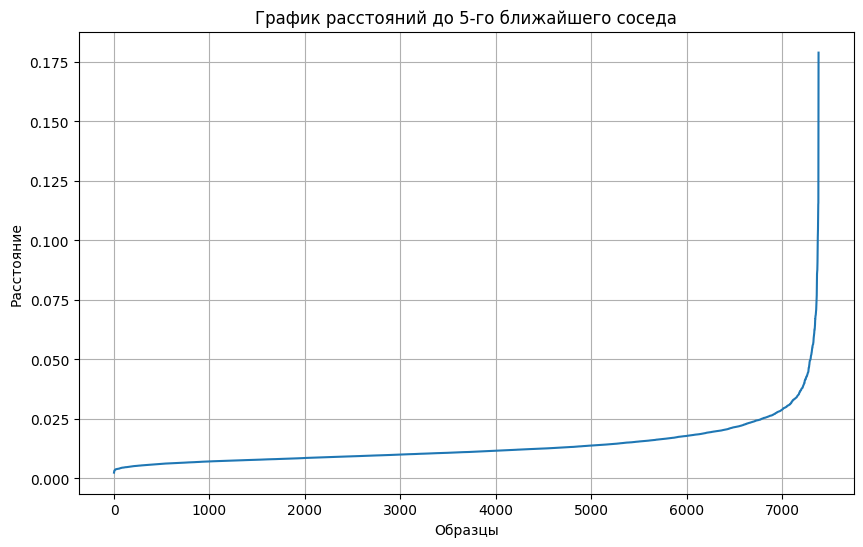

In [165]:
# Вычисляем расстояния до ближайших соседей
neighbors = NearestNeighbors(n_neighbors=5)  # min_samples
neighbors_fit = neighbors.fit(df_clusterization[['PCA1', 'PCA2']])
distances, indices = neighbors_fit.kneighbors(df_clusterization[['PCA1', 'PCA2']])
# Сортируем расстояни
distances = np.sort(distances[:, 4], axis=0) # Пятое расстояние (из-за 0-индексации)
# Строим график
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('График расстояний до 5-го ближайшего соседа')
plt.xlabel('Образцы')
plt.ylabel('Расстояние')
plt.grid()
plt.show()

Cluster
0    7381
Name: count, dtype: int64


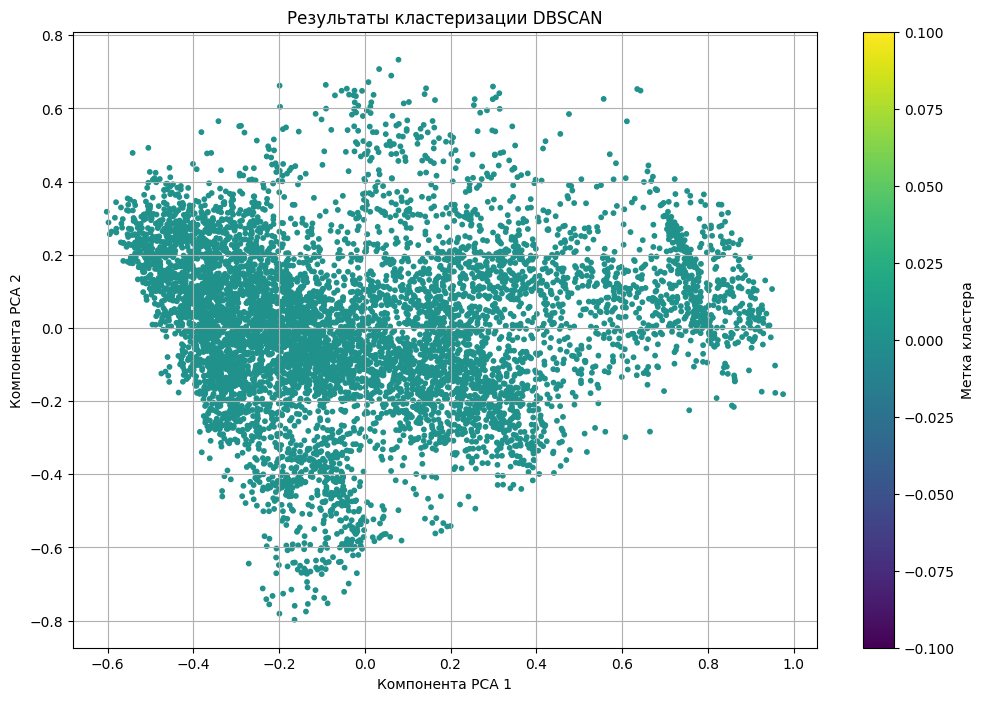

In [166]:
# Установка лучших гиперпараметров, найденных по сетке
eps=0.9
min_samples =4
# Стандартизация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clusterization[['PCA1', 'PCA2']])
# Кластеризация с использованием DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df_clusterization['Cluster'] = dbscan.fit_predict(scaled_data)
# Проверка результатов
print(df_clusterization['Cluster'].value_counts())
# Визуализация результатов кластеризации
def show_scutter():
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(x='PCA1', y='PCA2', c='Cluster', data=df_clusterization, cmap='viridis', s=10)
    plt.title('Результаты кластеризации DBSCAN')
    plt.xlabel('Компонента PCA 1')
    plt.ylabel('Компонента PCA 2')
    plt.colorbar(scatter, label='Метка кластера')
    plt.grid(True)
    plt.show()

show_scutter()


На этой визуализации видна уже более выраженная кластеризация с точки зрения соседних точек, но все равно недостаточная и все точки были отнесены к одному кластеру или шуму.

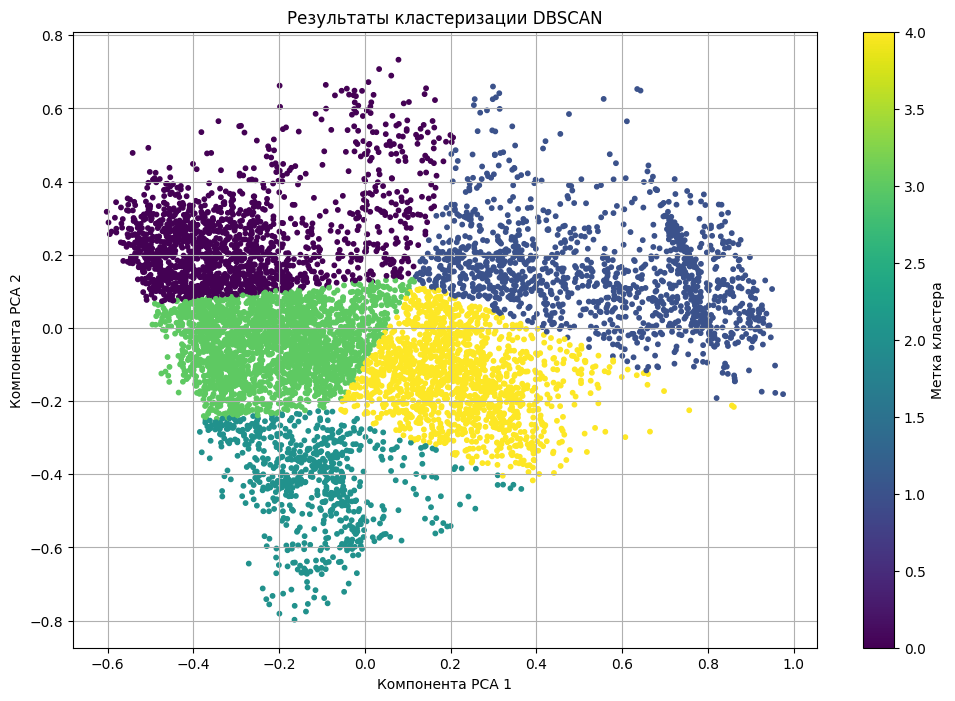

In [167]:
# Установка числа кластеров
n_clusters=5
kmeans=KMeans(n_clusters=n_clusters, random_state=42)
df_clusterization['Cluster'] = kmeans.fit_predict(scaled_data)
show_scutter()

Эти результаты можно считать лучше, чем полученные ранее при DBscan, (хотя их тоже нельзя назвать идеальными). Хотябы разделил данные на кластеры.

## 4. Интерпретация результатов. Выводы.

Был проведен анализ данных перед кластеризацией и данные были проверены на выбросы. Выбросы были обработаны перед кластеризацией, данные очищены (сокращено количество столбцов, представленных похожими параметрами или коррелирующими >0.8). Был проведен поиск гиперпараметров. DBSCAN оказался не сверхудачным методом.

Проведенная кластеризация обнаружила, что характер данных такой, что для дальнейшей достоверной кластеризации новых турбин данные лучше разбивать по двум признакам: датасет, отображающий производительность и датасет, отображающий экологичность, т.к. обработка данных сверхзаумлена и необходимо проводить дополнительный статистический анализ на достоверность результатов кластеризации, полученных после обработки и нормализации объединенных данных. Возможно попробовать произвести преданализ по двум признакам (Ecological и Performance), без разделения датасета на нормализованных, но не трансформированных данных.

In [168]:
df_binary_featured=pd.read_csv('normalized_data.csv')
df_binary_featured=df.drop(columns=['AP', 'Best_Cluster'])
df_binary_featured = df.rename(columns={'AP_normalized': 'AP'})
df_binary_featured=df.drop(columns=['Best_Cluster', 'PCA1', 'PCA2'])
df_binary_featured.head()

,AT,AP,AH,TEY,CO,NOX,AP_normalized
0,0.176190,0.501032,0.602501,0.188603,0.693147,0.363072,0.707246
1,0.161601,0.501032,0.622907,0.110647,0.639432,0.363072,0.707246
2,0.156182,0.527633,0.546971,0.285412,0.345842,0.363072,0.950725
3,0.157356,0.521363,0.534938,0.344415,0.291896,0.363072,0.892754
4,0.162935,0.520104,0.533111,0.356739,0.182752,0.676470,0.881159


Коэффициент силуэта: 0.3473625608936999


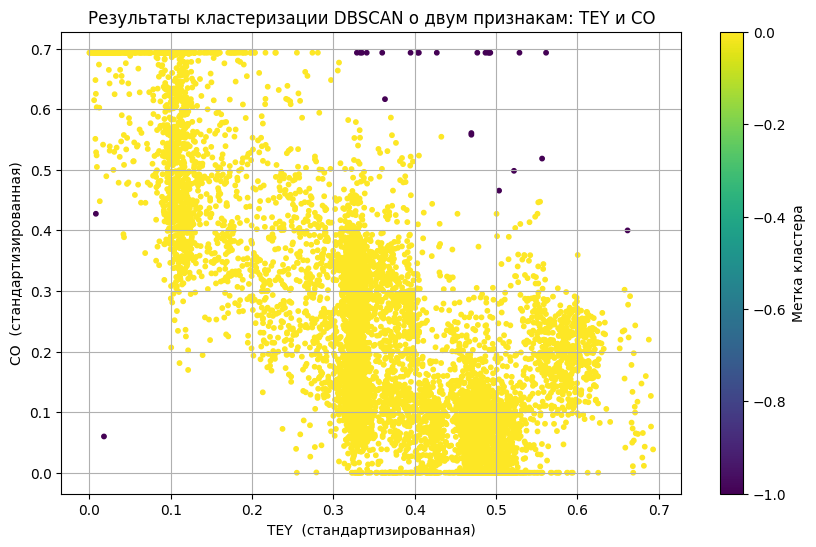

In [173]:
# Выбираем 2 признака, наиболее релевантных по отношению к параметрам экологичности и производительности
X=df_binary_featured[['TEY', 'CO']]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
def calculate_DBSCAN(eps=0.3, min_samples=12):
    # Примените DBSCAN для кластеризации с новыми параметрами
    dbscan=DBSCAN(eps=eps, min_samples=min_samples)
    clusters=dbscan.fit_predict(X_scaled)
    # Кластеризация
    df_binary_featured['Cluster'] = clusters
    # Оценка качество кластеризации с помощью коэффициента силуэта
    silhouette_avg = silhouette_score(X_scaled, clusters)
    print(f'Коэффициент силуэта: {silhouette_avg}')
    # Визуализируйте результаты
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(x='TEY', y='CO', c='Cluster', data=df_binary_featured, cmap='viridis', s=10)
    plt.title('Результаты кластеризации DBSCAN о двум признакам: TEY и CO')
    plt.xlabel('TEY  (стандартизированная)')
    plt.ylabel('CO  (стандартизированная)')
    plt.colorbar(scatter, label='Метка кластера')
    plt.grid(True)
    plt.show()


calculate_DBSCAN()

Коэффициент силуэта: 0.3656579977559718


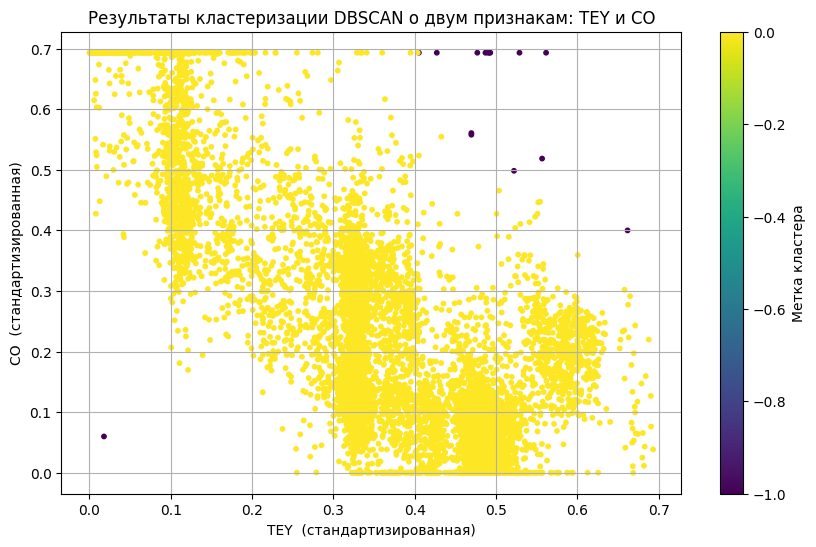

In [174]:
calculate_DBSCAN(eps=0.3, min_samples=7)

Коэффициент силуэта: 0.42460153215054874


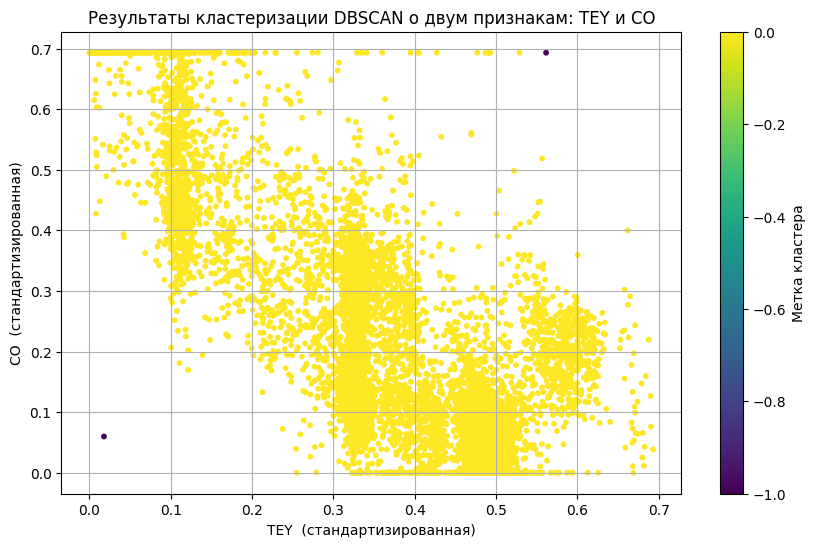

In [175]:
calculate_DBSCAN(eps=0.8, min_samples=20)

Коэффициент низкий, но положительный, производить улучшение кластеризации можно в этом направлении.